In [41]:
import pathlib
import numpy as np
import keras
data_dir = pathlib.Path("train/")


class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) 
print(class_names)


['Fire' 'Non-Fire']


In [42]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "test/"
test_dir = "train/"

In [43]:
# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 2000 images belonging to 2 classes.
Found 6003 images belonging to 2 classes.


## Adam optimizer

In [44]:
# Create a CNN model
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=4, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
  ])

# Compile the model
model_1.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=2,
                        # steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        # validation_steps=len(valid_data)
                       )

Epoch 1/2
63/63 [==============================] - 127s 2s/step - loss: 0.5281 - accuracy: 0.7340 - val_loss: 0.8962 - val_accuracy: 0.5832
Epoch 2/2
63/63 [==============================] - 130s 2s/step - loss: 0.3306 - accuracy: 0.8620 - val_loss: 0.9266 - val_accuracy: 0.6493


In [45]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 4)       112       
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      370       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [46]:
model_1.evaluate(valid_data)


188/188 [==============================] - 66s 350ms/step - loss: 0.9266 - accuracy: 0.6493


[0.9266173243522644, 0.6493420004844666]

In [47]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

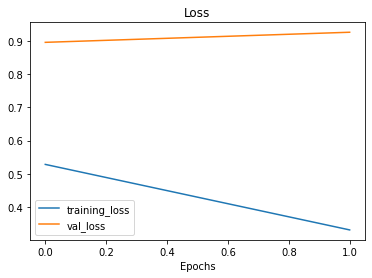

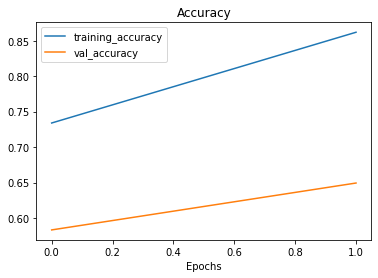

In [48]:
plot_loss_curves(history_1)